## Time series forecasting

Dataset: [Madrid weather dataset hourly 2019-2022](https://www.kaggle.com/datasets/rober2598/madrid-weather-dataset-by-hours-20192022/data)


Podaci sa meteorološke stanice Moratalaz u Madridu za period januar 2019-januar 2022.

Atributi:

1. temperature (ºC)
2. wind speed (m/s)
3. wind direction (in degrees)
4. humidity (%)
5. barometric pressure (mb)
6. solar radiation (W/m^2)
7. precipitation (l/m^2)

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import math
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
data = pd.read_csv("weather_madrid_2019-2022.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27024 entries, 0 to 27023
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           27024 non-null  int64  
 1   time                 27024 non-null  object 
 2   temperature          27024 non-null  float64
 3   wind_speed           27024 non-null  float64
 4   wind_direction       27024 non-null  float64
 5   humidity             27024 non-null  float64
 6   barometric_pressure  27024 non-null  float64
 7   solar_radiation      27024 non-null  float64
 8   precipitation        27024 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 1.9+ MB


In [4]:
print(f"Number of missing values in dataset:\n{data.isna().sum()}")

Number of missing values in dataset:
Unnamed: 0             0
time                   0
temperature            0
wind_speed             0
wind_direction         0
humidity               0
barometric_pressure    0
solar_radiation        0
precipitation          0
dtype: int64


In [5]:
data.head()

,Unnamed: 0,time,temperature,wind_speed,wind_direction,humidity,barometric_pressure,solar_radiation,precipitation
0,0,2019-01-01 00:59:59,3.1,0.65,64.0,50.0,949.0,0.0,0.0
1,1,2019-01-01 01:59:59,2.9,0.95,32.0,49.0,949.0,0.0,0.0
2,2,2019-01-01 02:59:59,3.1,0.87,62.0,46.0,949.0,0.0,0.0
3,3,2019-01-01 03:59:59,1.9,0.73,75.0,51.0,949.0,0.0,0.0
4,4,2019-01-01 04:59:59,0.7,0.57,53.0,56.0,949.0,0.0,0.0


In [6]:
data.pop('Unnamed: 0')
date = data.pop('time')

In [7]:
data.head()

,temperature,wind_speed,wind_direction,humidity,barometric_pressure,solar_radiation,precipitation
0,3.1,0.65,64.0,50.0,949.0,0.0,0.0
1,2.9,0.95,32.0,49.0,949.0,0.0,0.0
2,3.1,0.87,62.0,46.0,949.0,0.0,0.0
3,1.9,0.73,75.0,51.0,949.0,0.0,0.0
4,0.7,0.57,53.0,56.0,949.0,0.0,0.0


In [8]:
data.describe()

,temperature,wind_speed,wind_direction,humidity,barometric_pressure,solar_radiation,precipitation
count,27024.000000,27024.000000,27024.000000,27024.000000,27024.000000,27024.000000,27024.000000
mean,12.817040,2.058503,142.523313,54.560909,940.013433,197.641282,0.045811
std,8.195516,1.253231,92.795447,22.700106,17.668038,284.877404,0.463671
min,-9.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000,1.100000,62.000000,36.000000,938.000000,0.000000,0.000000
50%,11.400000,1.800000,122.000000,53.000000,941.000000,9.000000,0.000000
75%,18.800000,2.770000,241.000000,72.000000,944.000000,355.000000,0.000000
max,37.900000,9.450000,359.000000,100.000000,952.000000,1068.000000,27.400000


In [13]:
data.skew()

temperature             0.461747
wind_speed              1.008883
wind_direction          0.248713
humidity                0.152653
barometric_pressure   -29.898869
solar_radiation         1.311261
precipitation          30.785920
dtype: float64

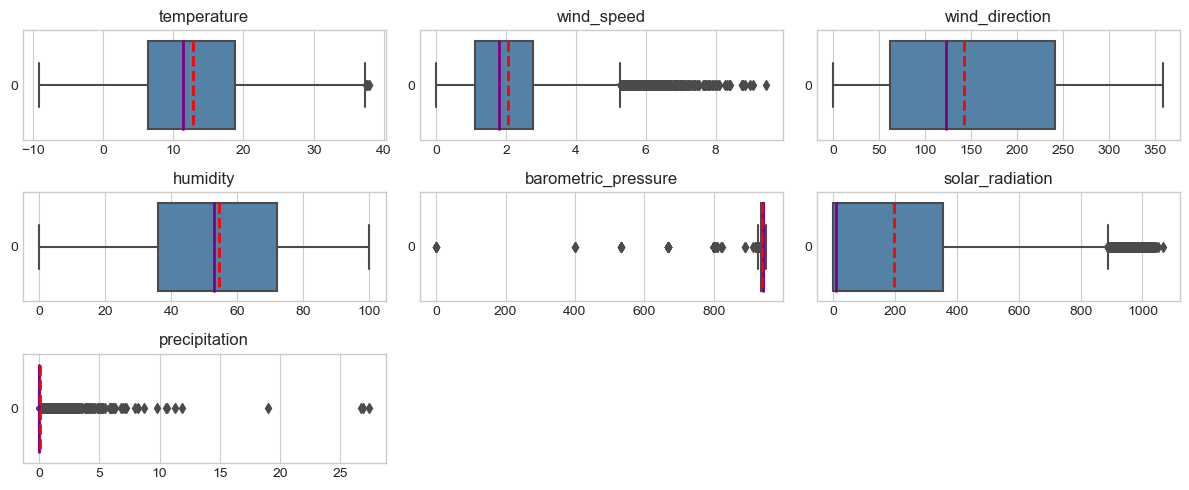

In [15]:
plt.figure(figsize=(12, 5))
for i, feature in enumerate(list(data.columns)):
    plt.subplot(3, 3, i+1)
    plt.title(feature)
    sns.boxplot(data[feature], orient='h', color="steelblue", showmeans=True, meanline=True,
                    medianprops={'linewidth': 2, 'color': 'purple'},
                    meanprops={'linewidth': 2, 'color': 'red'})
plt.tight_layout()

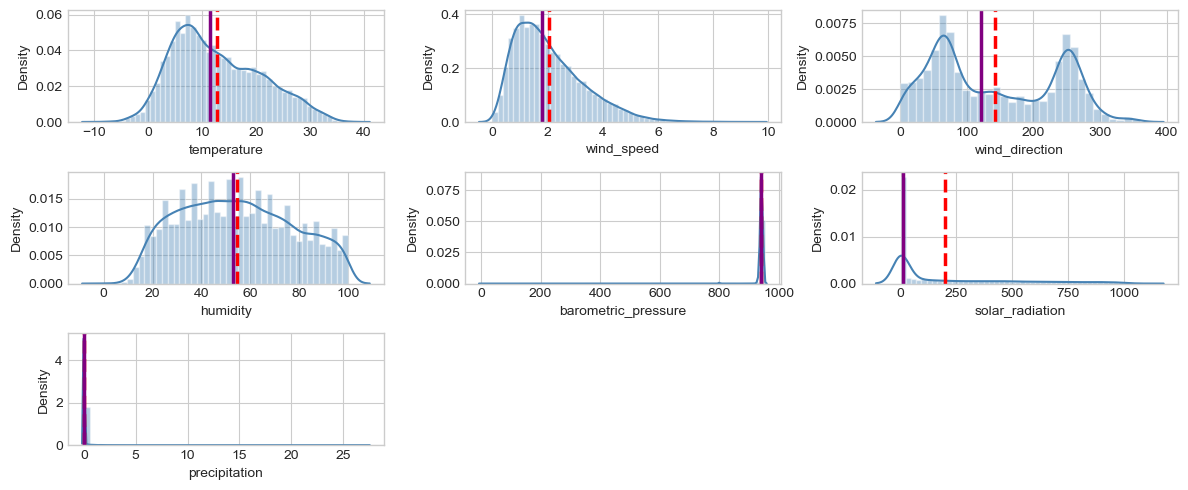

In [17]:
plt.figure(figsize=(12, 5))
for i, feature in enumerate(list(data.columns)):
    plt.subplot(3, 3, i+1)
    sns.distplot(data[feature], color="steelblue")
    plt.axvline(x=data[feature].mean(), c='red', ls='--', lw=2.5)
    plt.axvline(x=data[feature].median(), c='purple', ls='-', lw=2.5)
plt.tight_layout()

In [ ]:
# izbaciti outlajere kod barimetric_pressure

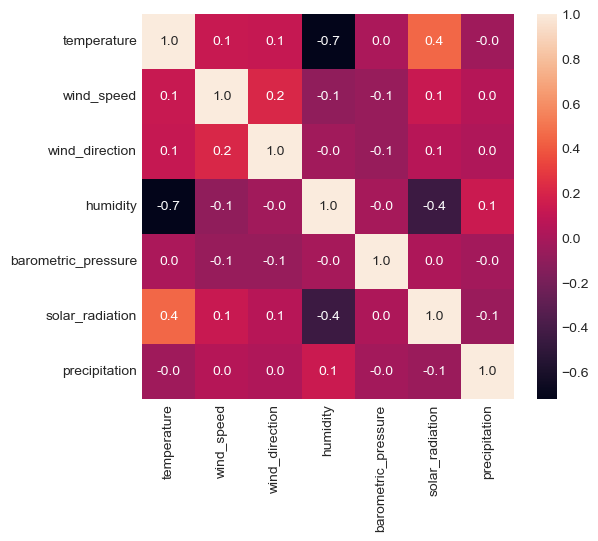

In [18]:
plt.figure(figsize=(6, 5))
sns.heatmap(data.corr(), annot = True, fmt='.1f')
plt.show()

In [5]:
training_data_len = math.ceil(len(data) * .8)
train_data = data[:training_data_len].iloc[:, :1] 
test_data = data[training_data_len:].iloc[:, :1]

print(train_data.shape, test_data.shape)

(21620, 1) (5404, 1)


In [6]:
dataset_train = train_data.temperature.values 
dataset_train = np.reshape(dataset_train, (-1, 1)) 

dataset_test = test_data.temperature.values 
dataset_test = np.reshape(dataset_test, (-1, 1)) 

print(dataset_train.shape)
print(dataset_test.shape)

(21620, 1)
(5404, 1)


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(dataset_train)
scaled_test = scaler.transform(dataset_test)

In [8]:
X_train = []
y_train = []
for i in range(50, len(scaled_train)):
    X_train.append(scaled_train[i-50:i, 0])
    y_train.append(scaled_train[i, 0])

X_test = []
y_test = []
for i in range(50, len(scaled_test)):
    X_test.append(scaled_test[i-50:i, 0])
    y_test.append(scaled_test[i, 0])

In [9]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # 3-dimensional array of shape (samples, time steps, features)
y_train = np.reshape(y_train, (y_train.shape[0], 1)) # 2-dimensional array of shape (samples, features)

print("X_train :", X_train.shape,"y_train :", y_train.shape)

X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0], 1))
print("X_test :",X_test.shape, "y_test :", y_test.shape)

X_train : (21570, 50, 1) y_train : (21570, 1)
X_test : (5354, 50, 1) y_test : (5354, 1)


In [10]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU
from keras.optimizers.legacy import SGD
from sklearn.metrics import mean_squared_error

### SimpleRNN

In [11]:
simple_RNN_model = Sequential()
simple_RNN_model.add(SimpleRNN(units=50, 
                        activation="tanh",
                        return_sequences=True,
                        input_shape=(X_train.shape[1],1)))
simple_RNN_model.add(Dropout(0.2))
simple_RNN_model.add(SimpleRNN(units=50, 
                        activation="tanh",
                        return_sequences=True))
simple_RNN_model.add(SimpleRNN(units=50,
                        activation="tanh",
                        return_sequences=True))
simple_RNN_model.add(SimpleRNN(units=50))
simple_RNN_model.add(Dense(units=1,activation='sigmoid'))
 

simple_RNN_model.compile(optimizer=SGD(learning_rate=0.01,
                                  decay=1e-6, 
                                  momentum=0.9, 
                                  nesterov=True), 
                        loss="mean_squared_error")
simple_RNN_model.fit(X_train, y_train, epochs=10, batch_size=2)
simple_RNN_model.summary()


Epoch 1/10

10785/10785 [==============================] - 394s 35ms/step - loss: 0.0015
Epoch 2/10
10785/10785 [==============================] - 370s 34ms/step - loss: 6.2351e-04
Epoch 3/10
10785/10785 [==============================] - 364s 34ms/step - loss: 5.0582e-04
Epoch 4/10
10785/10785 [==============================] - 365s 34ms/step - loss: 4.5297e-04
Epoch 5/10
10785/10785 [==============================] - 364s 34ms/step - loss: 4.1701e-04
Epoch 6/10
10785/10785 [==============================] - 365s 34ms/step - loss: 3.9131e-04
Epoch 7/10
10785/10785 [==============================] - 363s 34ms/step - loss: 3.7437e-04
Epoch 8/10
10785/10785 [==============================] - 363s 34ms/step - loss: 3.6422e-04
Epoch 9/10
10785/10785 [==============================] - 365s 34ms/step - loss: 3.4371e-04
Epoch 10/10
10785/10785 [==============================] - 366s 34ms/step - loss: 3.3591e-04
Model: "sequential"
_____________________________________________________________

### LSTM RNN 

In [20]:
LSTM_model = Sequential()
LSTM_model.add(LSTM(50, 
                       return_sequences=True, 
                       input_shape=(X_train.shape[1],1)))
LSTM_model.add(LSTM(50, 
                       return_sequences=False))
LSTM_model.add(Dense(25))
LSTM_model.add(Dense(1))
 

LSTM_model.compile(optimizer='adam',
                      loss='mean_squared_error',
                      metrics=["accuracy"])
LSTM_model.fit(X_train, 
                  y_train, 
                  batch_size=1, 
                  epochs=12)
LSTM_model.summary()


Epoch 1/12

21570/21570 [==============================] - 680s 30ms/step - loss: 6.9709e-04 - accuracy: 9.2721e-05
Epoch 2/12
21570/21570 [==============================] - 615s 29ms/step - loss: 3.0039e-04 - accuracy: 9.2721e-05
Epoch 3/12
21570/21570 [==============================] - 804s 37ms/step - loss: 2.6790e-04 - accuracy: 9.2721e-05
Epoch 4/12
21570/21570 [==============================] - 707s 33ms/step - loss: 2.5448e-04 - accuracy: 9.2721e-05
Epoch 5/12
21570/21570 [==============================] - 974s 45ms/step - loss: 2.4394e-04 - accuracy: 9.2721e-05
Epoch 6/12
21570/21570 [==============================] - 1021s 47ms/step - loss: 2.3701e-04 - accuracy: 9.2721e-05
Epoch 7/12
21570/21570 [==============================] - 880s 41ms/step - loss: 2.3365e-04 - accuracy: 9.2721e-05
Epoch 8/12
21570/21570 [==============================] - 444s 21ms/step - loss: 2.2553e-04 - accuracy: 9.2721e-05
Epoch 9/12
21570/21570 [==============================] - 400s 19ms/step - lo

### GRU RNN 

In [21]:
GRU_model = Sequential()
GRU_model.add(GRU(units=50, 
                     return_sequences=True,
                     input_shape=(X_train.shape[1],1),
                     activation='tanh'))
GRU_model.add(Dropout(0.2))
GRU_model.add(GRU(units=50, 
                     return_sequences=True,
                     activation='tanh'))
GRU_model.add(GRU(units=50, 
                     return_sequences=True,
                     activation='tanh'))
GRU_model.add(GRU(units=50, 
                     activation='tanh'))
GRU_model.add(Dense(units=1,
                       activation='relu'))


GRU_model.compile(optimizer=SGD(learning_rate=0.01, 
                                   decay=1e-7, 
                                   momentum=0.9, 
                                   nesterov=False),
                     loss='mean_squared_error')
GRU_model.fit(X_train,y_train,epochs=20, batch_size=1)
GRU_model.summary()

Epoch 1/20
21570/21570 [==============================] - 912s 42ms/step - loss: 0.0025
Epoch 2/20
21570/21570 [==============================] - 1148s 53ms/step - loss: 7.8431e-04
Epoch 3/20
21570/21570 [==============================] - 1296s 60ms/step - loss: 6.4487e-04
Epoch 4/20
21570/21570 [==============================] - 818s 38ms/step - loss: 5.8962e-04
Epoch 5/20
21570/21570 [==============================] - 843s 39ms/step - loss: 5.3270e-04
Epoch 6/20
21570/21570 [==============================] - 822s 38ms/step - loss: 4.9673e-04
Epoch 7/20
21570/21570 [==============================] - 822s 38ms/step - loss: 4.6657e-04
Epoch 8/20
21570/21570 [==============================] - 818s 38ms/step - loss: 4.4119e-04
Epoch 9/20
21570/21570 [==============================] - 822s 38ms/step - loss: 4.1369e-04
Epoch 10/20
21570/21570 [==============================] - 808s 37ms/step - loss: 4.0483e-04
Epoch 11/20
21570/21570 [==============================] - 811s 38ms/step - loss:

### Result

In [22]:
y_RNN = simple_RNN_model.predict(X_test)
y_LSTM = LSTM_model.predict(X_test)
y_GRU = GRU_model.predict(X_test)

y_RNN_O = scaler.inverse_transform(y_RNN) 
y_LSTM_O = scaler.inverse_transform(y_LSTM) 
y_GRU_O = scaler.inverse_transform(y_GRU)

168/168 [==============================] - 7s 22ms/step


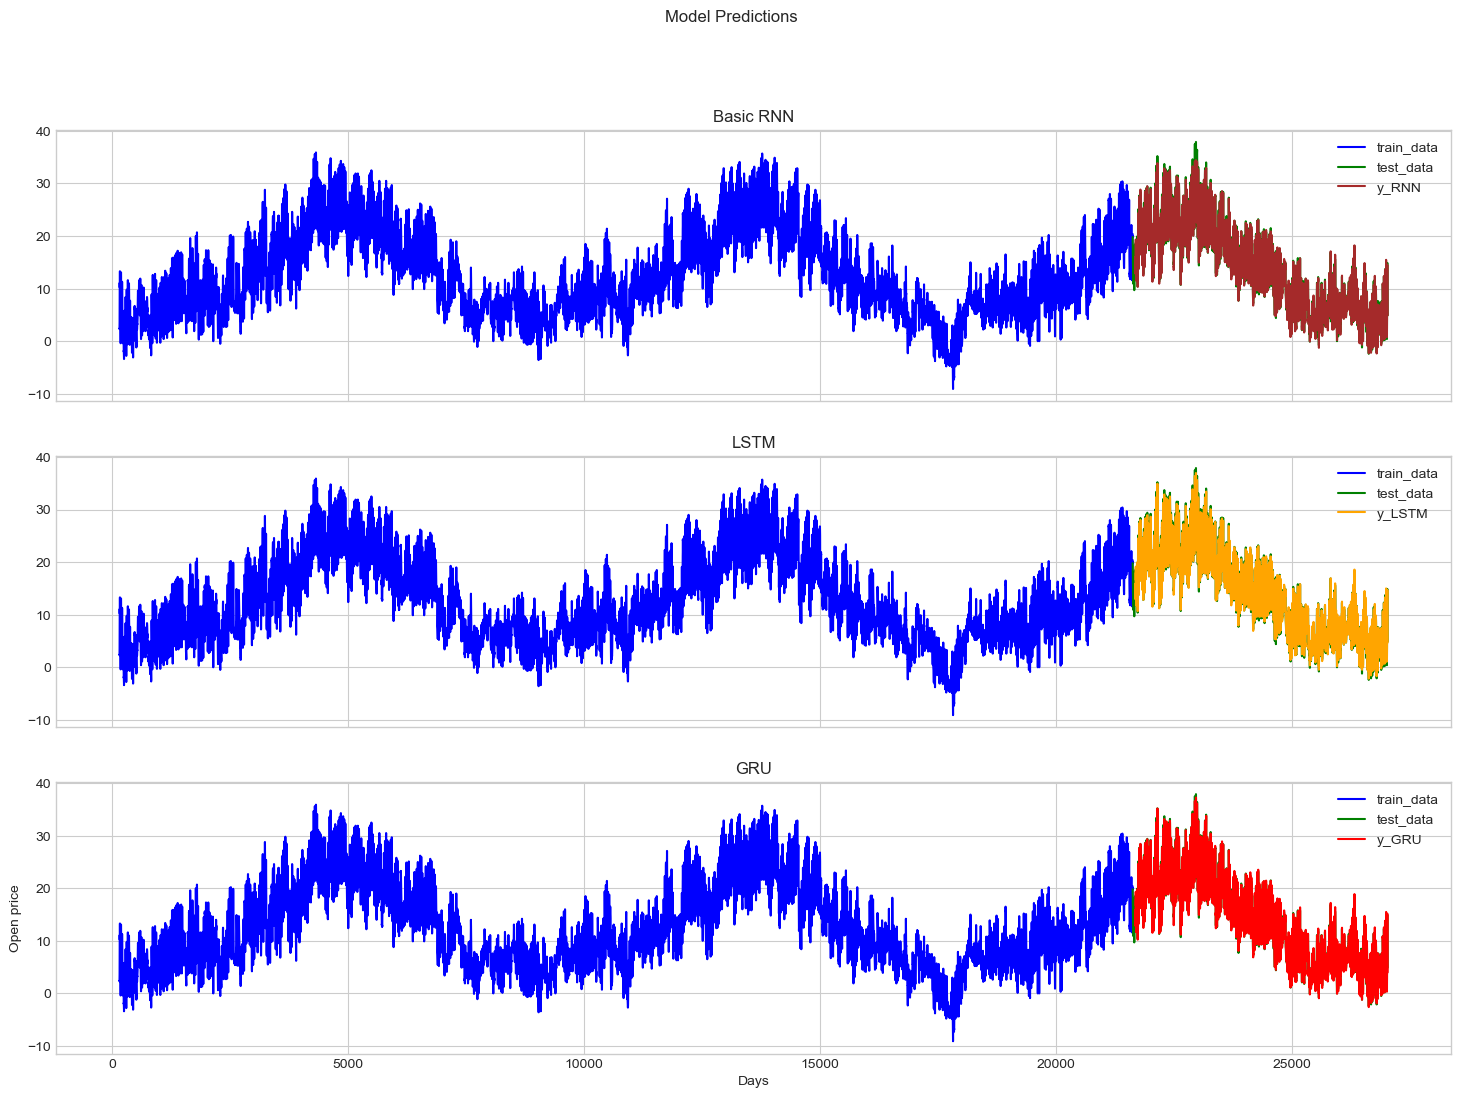

In [24]:
fig, axs = plt.subplots(3,figsize =(18,12),sharex=True, sharey=True)
fig.suptitle('Model Predictions')
 
#Plot for RNN predictions
axs[0].plot(train_data.index[150:], train_data.temperature[150:], label = "train_data", color = "b")
axs[0].plot(test_data.index, test_data.temperature, label = "test_data", color = "g")
axs[0].plot(test_data.index[50:], y_RNN_O, label = "y_RNN", color = "brown")
axs[0].legend()
axs[0].title.set_text("Basic RNN")
 
#Plot for LSTM predictions
axs[1].plot(train_data.index[150:], train_data.temperature[150:], label = "train_data", color = "b")
axs[1].plot(test_data.index, test_data.temperature, label = "test_data", color = "g")
axs[1].plot(test_data.index[50:], y_LSTM_O, label = "y_LSTM", color = "orange")
axs[1].legend()
axs[1].title.set_text("LSTM")
 
#Plot for GRU predictions
axs[2].plot(train_data.index[150:], train_data.temperature[150:], label = "train_data", color = "b")
axs[2].plot(test_data.index, test_data.temperature, label = "test_data", color = "g")
axs[2].plot(test_data.index[50:], y_GRU_O, label = "y_GRU", color = "red")
axs[2].legend()
axs[2].title.set_text("GRU")
 
plt.xlabel("Days")
plt.ylabel("Open price")
 
plt.show()